In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r"G:\Udemy Courses\Data Science\Refactored_Py_DS_ML_Bootcamp-master\13-Logistic-Regression\titanic_train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

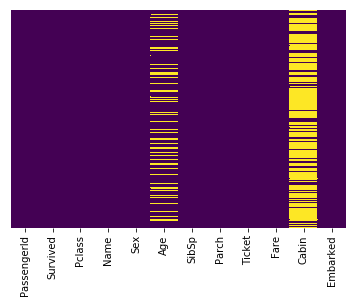

In [7]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False, cmap="viridis")

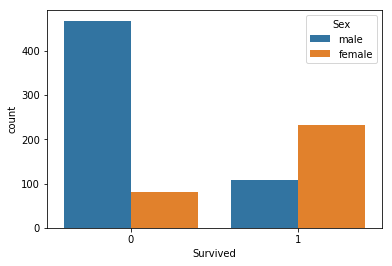

In [8]:
sns.countplot(x="Survived", hue="Sex", data=df)

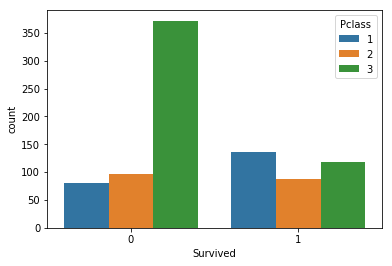

In [9]:
sns.countplot(x=df["Survived"], hue="Pclass", data=df)

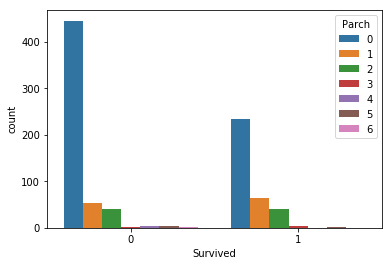

In [10]:
sns.countplot(x=df["Survived"], hue="Parch", data=df)

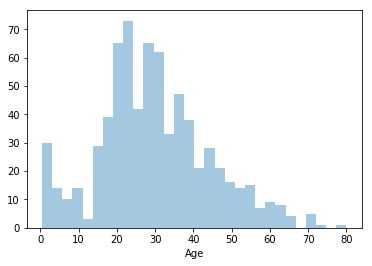

In [11]:
sns.distplot(df["Age"].dropna(),bins=30, kde =False)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


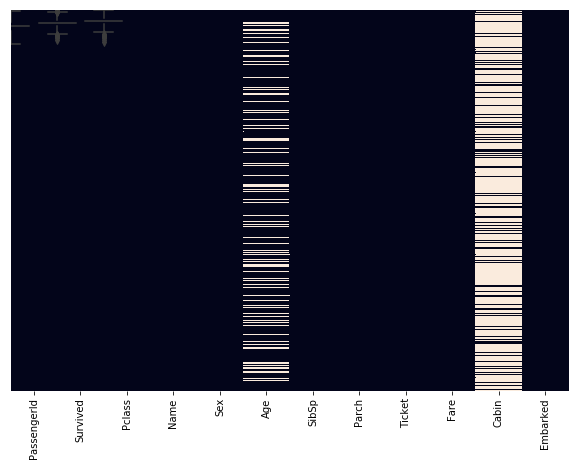

In [13]:
plt.figure(figsize=(10,7))
sns.boxplot(x="Pclass", y="Age", data=df)
sns.heatmap(df.isnull(), cbar =False, yticklabels= False)

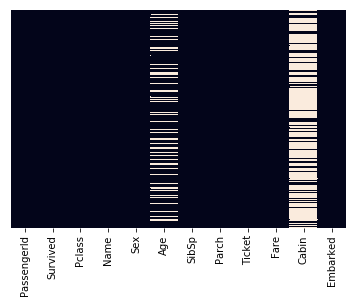

In [14]:
def impute_age(cols):
    age = cols[0]
    Pclass = cols[1]
    if pd.isnull(age):
        if Pclass == 1:
            return 37
        elif Pclass ==2:
            return 29
        else:
               return 24
        
    else:
        return age
sns.heatmap(df.isnull(), cbar =False, yticklabels= False)

In [15]:
df["Age"] = df[["Age","Pclass"]].apply(impute_age, axis=1)

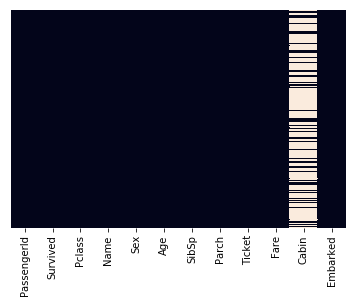

In [16]:
sns.heatmap(df.isnull(), cbar =False, yticklabels= False)

In [17]:
df.drop(labels ="Cabin", axis=1, inplace=True)

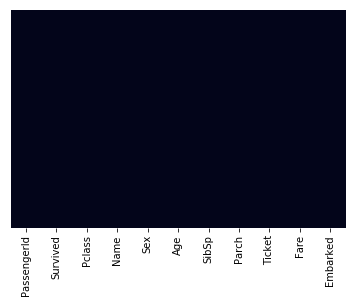

In [18]:
sns.heatmap(df.isnull(), cbar =False, yticklabels= False)

In [19]:
df.dropna(inplace=True)

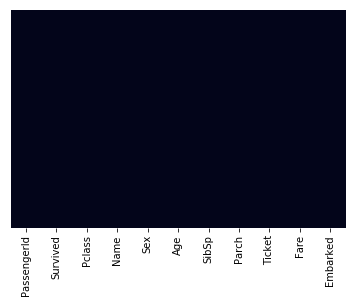

In [20]:
sns.heatmap(df.isnull(), cbar =False, yticklabels= False)

In [21]:
sex = pd.get_dummies(df["Sex"], drop_first=True)

In [22]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [23]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [24]:
embarked = pd.get_dummies(df["Embarked"],drop_first=True)

In [25]:
embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [26]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [27]:
df.drop(['PassengerId', 'Name', 'Sex', 'Ticket', 'Embarked'], axis = 1, inplace=True)

In [28]:
pd.concat([df,sex,embarked],axis=1)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
5,0,3,24.0,0,0,8.4583,1,1,0
6,0,1,54.0,0,0,51.8625,1,0,1
7,0,3,2.0,3,1,21.0750,1,0,1
8,1,3,27.0,0,2,11.1333,0,0,1
9,1,2,14.0,1,0,30.0708,0,0,0


In [29]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [31]:
df.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [32]:
X=df.drop('Survived',axis=1)

In [33]:
X.head()

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500


In [34]:
Y = df["Survived"]

In [35]:
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [36]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33,random_state=101)

In [37]:
model=LogisticRegression()

In [38]:
model.fit(X_train,Y_train)

c:\users\manuj mehrotra\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [39]:
predicition= model.predict(X_test)

In [40]:
from sklearn.metrics import classification_report, confusion_matrix

In [41]:
print(classification_report(Y_test,predicition))

              precision    recall  f1-score   support

           0       0.71      0.90      0.79       174
           1       0.75      0.46      0.57       120

   micro avg       0.72      0.72      0.72       294
   macro avg       0.73      0.68      0.68       294
weighted avg       0.73      0.72      0.70       294



In [42]:
from sklearn.metrics import accuracy_score

In [43]:
print(accuracy_score(predicition,Y_test))

0.717687074829932


In [44]:
from sklearn.svm import SVC

In [45]:
model_SVC = SVC()

In [46]:
model_SVC.fit(X_train,Y_train)

c:\users\manuj mehrotra\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [47]:
prediction_SVC = model_SVC.predict(X_test)

In [48]:
print(classification_report(Y_test,prediction_SVC))

              precision    recall  f1-score   support

           0       0.66      0.85      0.74       174
           1       0.63      0.37      0.46       120

   micro avg       0.65      0.65      0.65       294
   macro avg       0.64      0.61      0.60       294
weighted avg       0.65      0.65      0.63       294



In [49]:
print(accuracy_score(Y_test,prediction_SVC))

0.6530612244897959


In [50]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
model_rfc = RandomForestClassifier(n_estimators=200,max_depth=10)

In [76]:
model_rfc.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [77]:
prediction_rfc = model_rfc.predict(X_test)

In [78]:
print(classification_report(Y_test,prediction_rfc))

              precision    recall  f1-score   support

           0       0.73      0.79      0.76       174
           1       0.65      0.57      0.61       120

   micro avg       0.70      0.70      0.70       294
   macro avg       0.69      0.68      0.68       294
weighted avg       0.70      0.70      0.70       294



In [79]:
print(accuracy_score(Y_test,prediction_rfc))

0.7006802721088435
